In [174]:
import sklearn.tree as tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as smm
import sklearn.metrics as skm
from sklearn.metrics import mean_squared_error,r2_score
# import mlxtend as mx
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import sklearn.neighbors as sn

# Question 2

In [175]:
titanicdata = pd.read_csv("titanic3.csv") #reading the titanics data 
titanicdata

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [176]:
titanicdata.isnull().sum() #checking for null values 
# filling na values with average of the column
titanicdata['age'] = titanicdata['age'].fillna(titanicdata['age'].mean())
titanicdata['body'] = titanicdata['body'].fillna(titanicdata['body'].mean())
titanicdata['fare'] = titanicdata['fare'].fillna(titanicdata['fare'].mean())
titanicdata

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.000000,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,2665,14.4542,NaN,C,NaN,160.809917,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.000000,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,160.809917,NaN


In [177]:
# replacing values
titanicdata['sex'].replace(['female', 'male'],
                        [1, 2], inplace=True)
x = titanicdata[['pclass', 'sex','age']]
y = titanicdata['survived'] 

In [178]:
f_tree = DecisionTreeClassifier(criterion = "gini", random_state = 0) #fitting decision tree 
f_tree.fit(x,y)


DecisionTreeClassifier(random_state=0)

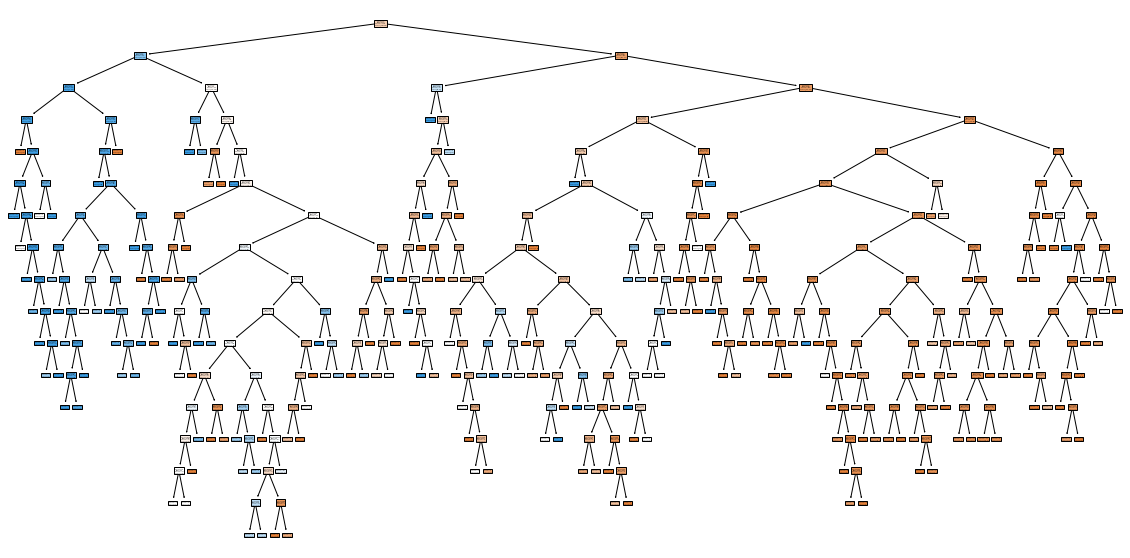

0.77 0.02
Misclassification error:  0.22842630651790963


In [179]:
#plotting the figure for the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(f_tree,filled=True)
plt.show()

#cross validation of the decision tree 
kf = StratifiedKFold(n_splits=10, random_state=0,shuffle=True)
score3 = cross_val_score(f_tree, x, y, scoring='accuracy', cv=kf)
print(round(score3.mean(),2),round(score3.std(),2) )

#missclassification error
print("Misclassification error: ",1-score3.mean())

In [180]:
y_pred = f_tree.predict(x) #making predictions with decision tree. 
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

[Text(0.5, 0.875, 'X[1] <= 1.5\ngini = 0.472\nsamples = 1309\nvalue = [809, 500]'),
 Text(0.25, 0.625, 'X[0] <= 2.5\ngini = 0.397\nsamples = 466\nvalue = [127, 339]'),
 Text(0.125, 0.375, 'X[0] <= 1.5\ngini = 0.127\nsamples = 250\nvalue = [17, 233]'),
 Text(0.0625, 0.125, 'gini = 0.067\nsamples = 144\nvalue = [5, 139]'),
 Text(0.1875, 0.125, 'gini = 0.201\nsamples = 106\nvalue = [12, 94]'),
 Text(0.375, 0.375, 'X[2] <= 1.5\ngini = 0.5\nsamples = 216\nvalue = [110, 106]'),
 Text(0.3125, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 209\nvalue = [109, 100]'),
 Text(0.75, 0.625, 'X[2] <= 9.5\ngini = 0.309\nsamples = 843\nvalue = [682, 161]'),
 Text(0.625, 0.375, 'X[0] <= 2.5\ngini = 0.487\nsamples = 43\nvalue = [18, 25]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.6875, 0.125, 'gini = 0.471\nsamples = 29\nvalue = [18, 11]'),
 Text(0.875, 0.375, 'X[0] <= 1.5\ngini = 0.282\nsamples = 800\nvalue = [664, 136

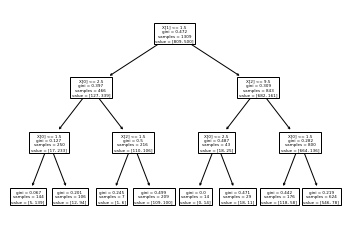

In [181]:
#building the first version of a pruned decision tree
dec_tree = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
dec_tree.fit(x, y)
tree.plot_tree(dec_tree)

In [182]:
#making predictions
y_pred = dec_tree.predict(x)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [183]:
#cross validation of the pruned decision tree 
kf = StratifiedKFold(n_splits=10, random_state=1,shuffle=True) 
score = cross_val_score(dec_tree, x, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(round(score.mean(),2),round(score.std(),2) )
print("Misclassification error: ",1-round(score.mean(),2))

0.79 0.03
Misclassification error:  0.20999999999999996


In [184]:
#fitting a second pruned tree 
pruned_dec_tree = DecisionTreeClassifier(random_state=1,ccp_alpha=0.003)
pruned_dec_tree.fit(x,y)
y_train_pred = pruned_dec_tree.predict(x)

#cross validation of the second pruned tree 
kf = StratifiedKFold(n_splits=10, random_state=1,shuffle=True) 
score2 = cross_val_score(pruned_dec_tree, x, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(round(score2.mean(),2),round(score2.std(),2) )

0.79 0.04


[Text(0.4090909090909091, 0.875, 'X[1] <= 1.5\ngini = 0.472\nsamples = 1309\nvalue = [809, 500]'),
 Text(0.18181818181818182, 0.625, 'X[0] <= 2.5\ngini = 0.397\nsamples = 466\nvalue = [127, 339]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.127\nsamples = 250\nvalue = [17, 233]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.5\nsamples = 216\nvalue = [110, 106]'),
 Text(0.6363636363636364, 0.625, 'X[2] <= 9.5\ngini = 0.309\nsamples = 843\nvalue = [682, 161]'),
 Text(0.45454545454545453, 0.375, 'X[0] <= 2.5\ngini = 0.487\nsamples = 43\nvalue = [18, 25]'),
 Text(0.36363636363636365, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.5454545454545454, 0.125, 'gini = 0.471\nsamples = 29\nvalue = [18, 11]'),
 Text(0.8181818181818182, 0.375, 'X[0] <= 1.5\ngini = 0.282\nsamples = 800\nvalue = [664, 136]'),
 Text(0.7272727272727273, 0.125, 'gini = 0.442\nsamples = 176\nvalue = [118, 58]'),
 Text(0.9090909090909091, 0.125, 'gini = 0.219\nsamples = 624\nvalue = [546, 78]')]

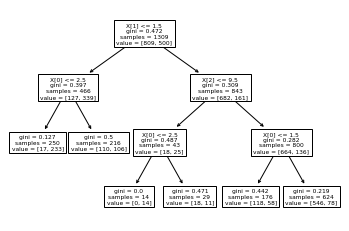

In [185]:
tree.plot_tree(pruned_dec_tree) #plotting the tree 

In [186]:
pruned_dec_tree = DecisionTreeClassifier(random_state=1,ccp_alpha=0.0030)
pruned_dec_tree.fit(x,y)
y_train_pred2 = pruned_dec_tree.predict(x)
# y_test_pred2 = pruned_dec_tree.predict(x_test)

kf = StratifiedKFold(n_splits=10, random_state=1,shuffle=True) 
score2 = cross_val_score(pruned_dec_tree, x, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(round(score2.mean(),2),round(score2.std(),2) )

0.79 0.04


In [187]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression(random_state=0)
modelLogistic.fit(x,y)
#Make prediction for the test data
y_pred= modelLogistic.predict(x)
ConfusionMatrix = confusion_matrix(y, y_pred)
print(ConfusionMatrix)
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
print("Accuracy from confusion matrix is ", round((TN+TP)/len(y),2))
kf = StratifiedKFold(n_splits=10, random_state=0,shuffle=True) 
scoree = cross_val_score(modelLogistic, x, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(round(score.mean(),2),round(scoree.std(),2) )
print("Error: ",1-round(score.mean(),2))

[[686 123]
 [158 342]]
Accuracy from confusion matrix is  0.79
0.79 0.03
Error:  0.20999999999999996


# Question 3

In [190]:
neighbours = [1,2,3,4,5,6,7,8,9,10,15,20]
cv = []
iss = []
for num in neighbours:
#     print(num)
    f_knn =KNeighborsClassifier(n_neighbors=num)
    model = f_knn.fit(x,y)
#     knn_pred = model.pred(x_test)
    knn_cv = cross_val_score(model,x,y,cv=10)
    cv.append(1-knn_cv.mean())
    knn_iss = model.score(x,y)
    iss.append(knn_iss.mean())
    print("Number of folds:",num,"Cross validation missclassification error: ",1-knn_cv.mean())
    print("Number of folds:",num,"Normal score: ",knn_iss.mean())
    print()
#     plt.plot(num,1-knn_cv.mean())
# plt.plot(np.array(cv).min(),1-knn_cv.mean(neighbours[cv.index(np.array(cv).min())],marker='o',label="optimal point")
# plt.legend()
# plt.xlabel('Number if neighbours')
# plt.ylabel('Loss')
# plt.title('Graph of loss against the number of k. ')
         
print("Cross validation: ",np.array(cv).min(),"Optimal Number of folds:",neighbours[cv.index(np.array(cv).min())])
print("Normal score : ",np.array(iss).max(),"Number of folds:",neighbours[iss.index(np.array(iss).max())])
print("Cross validation loss: ",1-np.array(cv).max())

Number of folds: 1 Cross validation missclassification error:  0.30411039342337054
Number of folds: 1 Normal score:  0.8059587471352178

Number of folds: 2 Cross validation missclassification error:  0.2605637110980623
Number of folds: 2 Normal score:  0.8051948051948052

Number of folds: 3 Cross validation missclassification error:  0.268220786846741
Number of folds: 3 Normal score:  0.8197097020626433

Number of folds: 4 Cross validation missclassification error:  0.25142102172636527
Number of folds: 4 Normal score:  0.8166539343009931

Number of folds: 5 Cross validation missclassification error:  0.2712683499706401
Number of folds: 5 Normal score:  0.8212375859434683

Number of folds: 6 Cross validation missclassification error:  0.26745155607751026
Number of folds: 6 Normal score:  0.8166539343009931

Number of folds: 7 Cross validation missclassification error:  0.27812096300645917
Number of folds: 7 Normal score:  0.8151260504201681

Number of folds: 8 Cross validation missclass

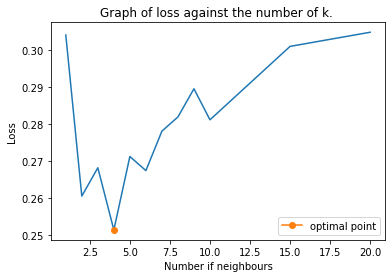

In [196]:
# loss = []
# for num in cv:
#     newnum = 1-num
#     loss.append(newnum)
# #     plt.plot(neighbours,num)
# # np.array(loss).min()
# # neighbours[loss.index(np.array(loss).min())]
plt.plot(neighbours,cv)
plt.plot(neighbours[cv.index(np.array(cv).min())],np.array(cv).min(),marker='o',label="optimal point")
plt.legend()
plt.xlabel('Number if neighbours')
plt.ylabel('Loss')
plt.title('Graph of loss against the number of k. ');
# plt.show()

In [197]:
#performance 
metrics = ['chebyshev' , 'euclidean', 'canberra', 'sokalsneath', 'hamming']
performance = []
for ametric in metrics:
    knn = KNeighborsClassifier(n_neighbors=4,metric=ametric)
    knn.fit(x,y)
    scores = knn.score(x,y)
    performance.append(scores)
    print(ametric,": ",scores)
# , 'euclidean', 'mahalanobis', 'sokalsneath', 'hamming'

chebyshev :  0.8044308632543926
euclidean :  0.8166539343009931
canberra :  0.8204736440030558
sokalsneath :  0.3819709702062643
hamming :  0.8128342245989305


In [ ]:
# sn.VALID_METRICS['brute']

# Question 4

In [198]:
#reading wine data
winequality_red= pd.read_csv("winequality-red.csv")
winequality_white= pd.read_csv("winequality-white.csv")    
data = pd.DataFrame({'redwine':winequality_red.mean()})
data['whitewine']=winequality_white.mean()
data

,redwine,whitewine
fixed acidity,8.319637,6.854788
volatile acidity,0.527821,0.278241
citric acid,0.270976,0.334192
residual sugar,2.538806,6.391415
chlorides,0.087467,0.045772
free sulfur dioxide,15.874922,35.308085
total sulfur dioxide,46.467792,138.360657
density,0.996747,0.994027
pH,3.311113,3.188267
sulphates,0.658149,0.489847


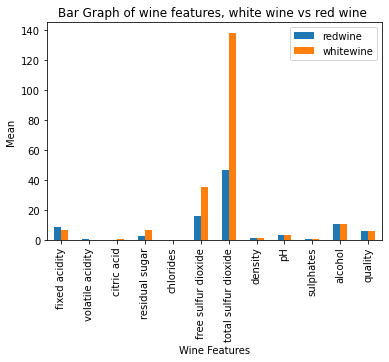

In [199]:
#plotting a comparison bargraph
data.plot(kind='bar')
plt.xlabel('Wine Features')
plt.ylabel('Mean ')
plt.title('Bar Graph of wine features, white wine vs red wine ');
plt.show()

In [200]:
winequality_red.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

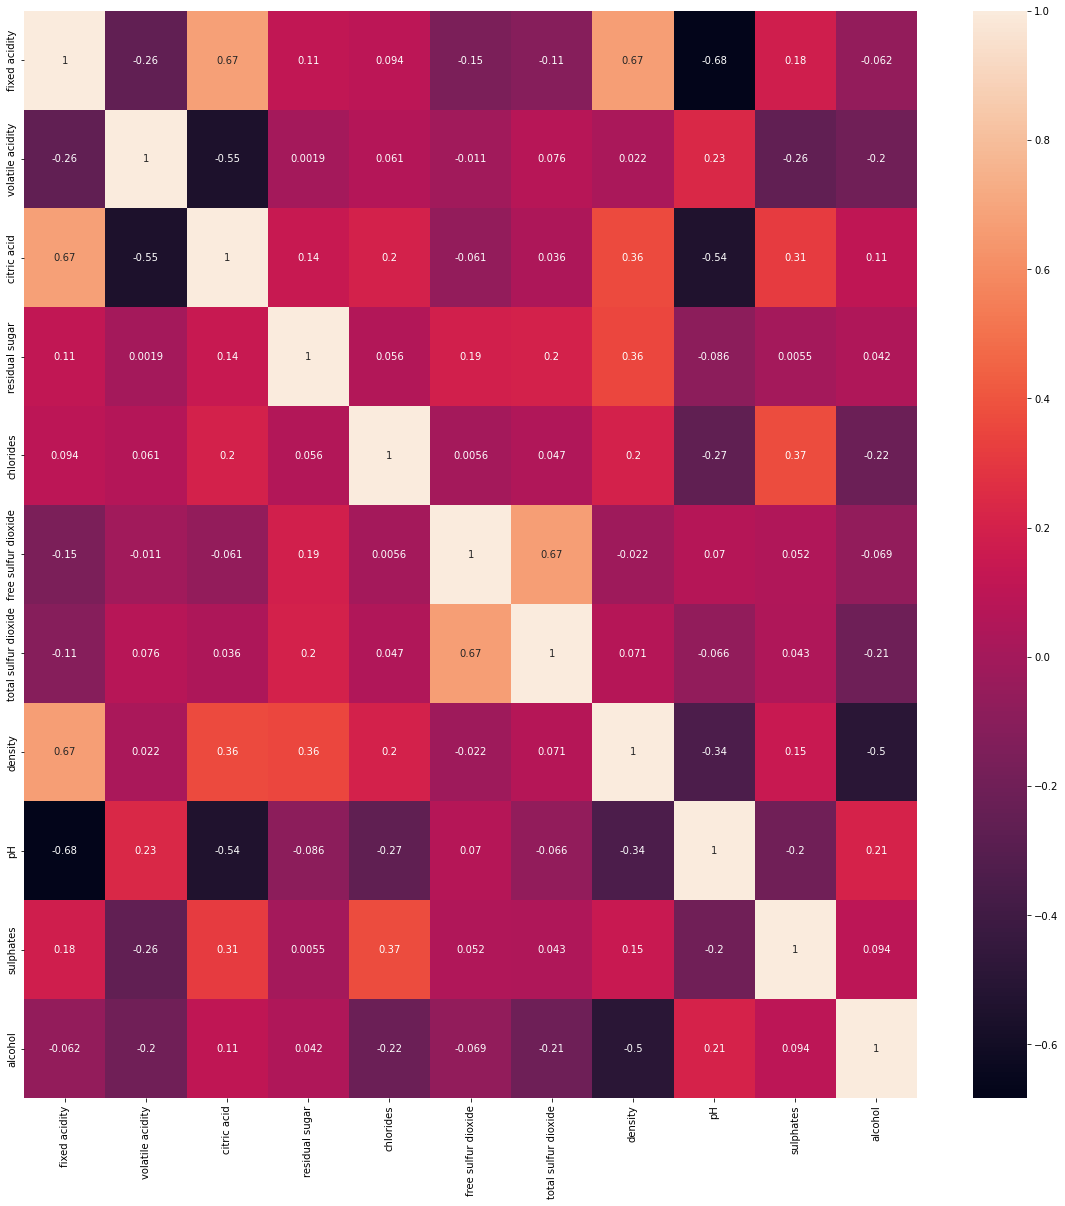

In [201]:
x_red = pd.DataFrame(winequality_red[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])  
matt = x_red.corr() #finding the correlation estimates 
plt.figure(figsize=(20,20))
y_red = winequality_red['quality']
dataplot = sb.heatmap(matt, annot=True) #plotting the heatmap
# displaying heatmap
plt.show()

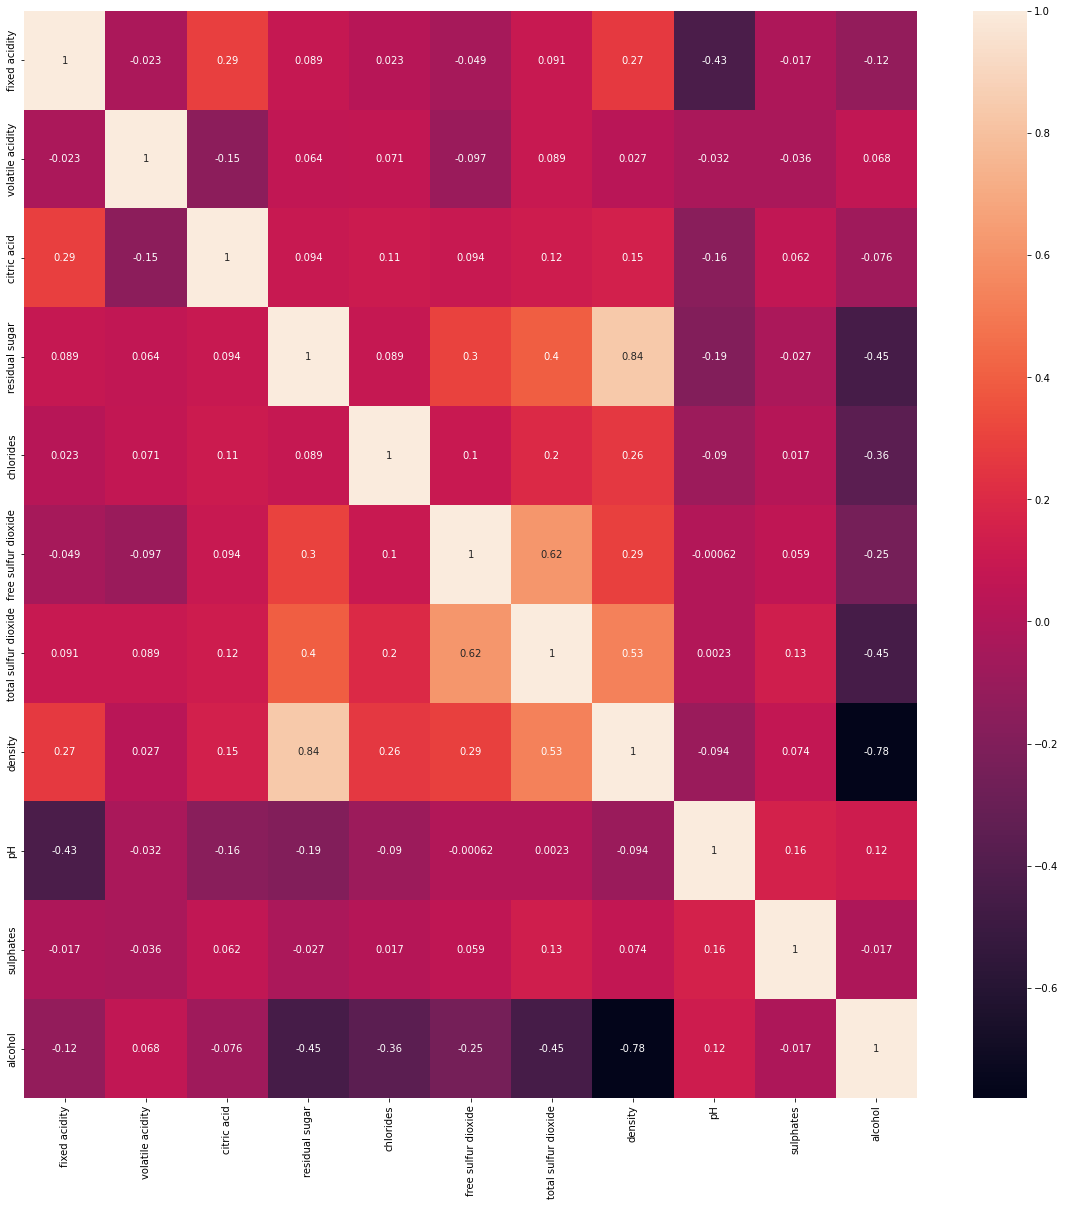

In [202]:
x_white = pd.DataFrame(winequality_white[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]) 
matt = x_white.corr() #finding the correlation estimates
plt.figure(figsize=(20,20))
y_white = winequality_white['quality']
dataplot = sb.heatmap(matt, annot=True) #plotting the heatmap 
# displaying heatmap
plt.show()

In [203]:
#lasso model
lasso_model1 = Lasso(alpha = 1).fit(x_red,y_red)
lasso_model2 = Lasso(alpha = 1).fit(x_white,y_white)

red_pred = lasso_model1.predict(x_red)
red_mse = mean_squared_error(y_red, red_pred)
print(' Red MSE =', round(red_mse, 2))

white_pred = lasso_model2.predict(x_white)
white_mse = mean_squared_error(y_white, white_pred)
print('White MSE =', round(white_mse, 2))

 Red MSE = 0.63
White MSE = 0.75


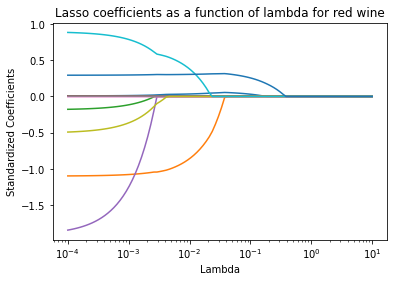

In [204]:
#lasso for red wine
alphas = np.logspace(-4,1,100)
lasso = Lasso()
coefs = []
score=[]

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_red, y_red)
    scores = cross_val_score(lasso,x_red,y_red,cv=10,scoring='neg_mean_squared_error')
    coefs.append(lasso.coef_)
    score.append(abs(scores).mean())
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of lambda for red wine');

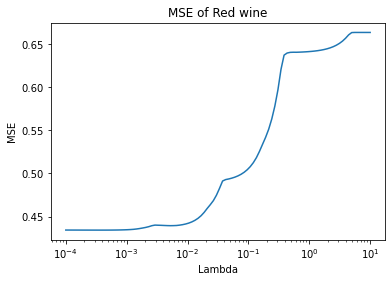

In [205]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, score)
plt.axis('tight')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE of Red wine');

In [206]:
# print(coefs)

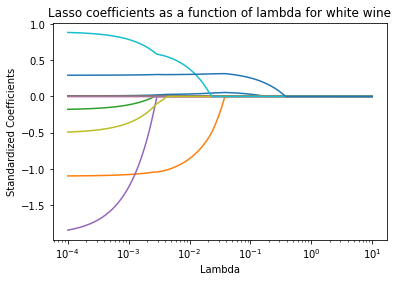

In [207]:
#fitting lasso for white wine 
alphas1 = np.logspace(-4,1,100)
lasso1 = Lasso()
coefs1 = []
score1=[]

for a in alphas:
    lasso1.set_params(alpha=a)
    lasso1.fit(x_white, y_white)
    scores1 = cross_val_score(lasso1,x_white,y_white,cv=10,scoring='neg_mean_squared_error')
    coefs1.append(lasso1.coef_)
    score1.append(abs(scores1).mean())
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of lambda for white wine');

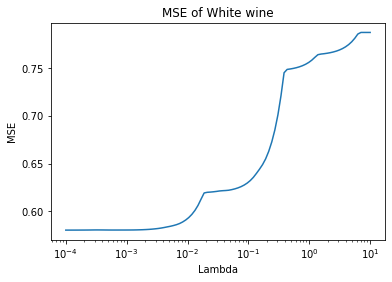

In [208]:
ax = plt.gca()


ax.set_xscale('log')
ax.plot(alphas, score1)
plt.axis('tight')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE of White wine');


In [209]:
# Lasso with 5 fold cross-validation red
model1 = LassoCV(cv=10, random_state=0)

# Fit model
model1.fit(x_red, y_red)
model1.alpha_

0.0052692947038249175

In [210]:
#  Set best alpha red and printing features identified by Lasso
lasso_best = Lasso(alpha=model1.alpha_)
lasso_best.fit(x_red, y_red)
print(list(zip(lasso_best.coef_, x_red)))

[(0.029844768086047125, 'fixed acidity'), (-0.9849545499214847, 'volatile acidity'), (-0.0, 'citric acid'), (0.0, 'residual sugar'), (-0.0, 'chlorides'), (0.004776180433621903, 'free sulfur dioxide'), (-0.0030690745200809967, 'total sulfur dioxide'), (-0.0, 'density'), (-0.0, 'pH'), (0.5193541180755874, 'sulphates'), (0.301766794470893, 'alcohol')]


In [211]:
# Lasso with 5 fold cross-validation white
model2 = LassoCV(cv=10, random_state=0)

# Fit model
model2.fit(x_white, y_white)
model2.alpha_

0.006575403607208948

In [212]:
#  Set best alpha red
lasso_best1 = Lasso(alpha=model2.alpha_)
lasso_best1.fit(x_white, y_white)
print(list(zip(lasso_best1.coef_, x_white)))

[(-0.051961526932861504, 'fixed acidity'), (-1.303798110095391, 'volatile acidity'), (0.0, 'citric acid'), (0.022013101318566947, 'residual sugar'), (-0.0, 'chlorides'), (0.005693925012019723, 'free sulfur dioxide'), (-0.001104004962384263, 'total sulfur dioxide'), (-0.0, 'density'), (0.0, 'pH'), (0.0, 'sulphates'), (0.35550214349603776, 'alcohol')]


In [213]:
#knn model for red wine

red_knn = KNeighborsClassifier(n_neighbors=19)
kf = KFold(n_splits=10, random_state=0,shuffle=True) 

In [214]:
skm.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [215]:
cv = []
# r22 = []
for num in range(1,21):
    f_knn =KNeighborsClassifier(n_neighbors=num)
    model = f_knn.fit(x,y_red)
    knn_cv = cross_val_score(model,x,y_red,cv=10)
    cv.append(abs(knn_cv.mean()))
    print("Number of folds:",num,"Cross validation: ",abs(knn_cv.mean()))
#     print("Number of folds:",num,"Cross validation: R2",r2_cv.mean())

print("Cross validation: ",np.array(cv).max())

Number of folds: 1 Cross validation:  0.4458490566037736
Number of folds: 2 Cross validation:  0.4427830188679246
Number of folds: 3 Cross validation:  0.44215015723270434
Number of folds: 4 Cross validation:  0.45216981132075473
Number of folds: 5 Cross validation:  0.4433922955974842
Number of folds: 6 Cross validation:  0.44780267295597487
Number of folds: 7 Cross validation:  0.4534237421383647
Number of folds: 8 Cross validation:  0.4577830188679245
Number of folds: 9 Cross validation:  0.46342767295597487
Number of folds: 10 Cross validation:  0.4646698113207547
Number of folds: 11 Cross validation:  0.4715566037735849
Number of folds: 12 Cross validation:  0.47654088050314475
Number of folds: 13 Cross validation:  0.4809198113207548
Number of folds: 14 Cross validation:  0.4790251572327044
Number of folds: 15 Cross validation:  0.47840408805031454
Number of folds: 16 Cross validation:  0.48153694968553457
Number of folds: 17 Cross validation:  0.4809158805031447
Number of folds:

In [221]:
#mse and r squared error for knn regression model for red wine
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x,y_red)
scores =abs(cross_val_score(knn,x,y_red,cv=10,scoring='neg_mean_squared_error'))
scores2 =abs(cross_val_score(knn,x,y_red,cv=10,scoring='r2'))
print("MSE: ",scores.mean())
print("r2 error: ",scores2.mean())

MSE:  0.7366430817610062
r2 error:  0.1456678905817085


In [217]:
#linear model for red wine
x=smm.add_constant(x) #adding a constant 
model1 = smm.OLS(y_red,x).fit() #fitting the model 
model1.summary() #summary of the model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     130.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          2.73e-134
Time:                        20:48:47   Log-Likelihood:                -1607.2
No. Observations:                1599   AIC:                             3228.
Df Residuals:                    1592   BIC:                             3266.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8734      0.229     12.545      0.000       2.424       3.323
fixed acidity            0.0342      0.010      3.351      0.001       0.014       0.054
volatile acidity        -1.2648      0.099    -12.786      0.000      -1.459      -1.071
residual sugar           0.0001      0.012      0.011      0.991      -0.024       0.024
free sulfur dioxide      0.0047      0.002      2.182      0.029       0.000       0.009
total sulfur dioxide    -0.0028      0.001     -3.959      0.000      -0.004      -0.001
alcohol                  0.3069      0.016     18.625      0.000       0.275       0.339
==============================================================================
Omnibus:                       25.319   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.918
Skew:                          -0.132   Prob(JB):                     2.15e-09
Kurtosis:                       3.728   Cond. No.                         860.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
x_edited=winequality_red[['fixed acidity','volatile acidity','free sulfur dioxide','total sulfur dioxide','alcohol']]

In [219]:
x_edited=smm.add_constant(x_edited) #adding a constant 
model2 = smm.OLS(y_red,x_edited).fit() #fitting the model 
model2.summary() #summary of the model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     156.5
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          2.07e-135
Time:                        20:48:47   Log-Likelihood:                -1607.2
No. Observations:                1599   AIC:                             3226.
Df Residuals:                    1593   BIC:                             3259.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8733      0.229     12.562      0.000       2.425       3.322
fixed acidity            0.0342      0.010      3.402      0.001       0.015       0.054
volatile acidity        -1.2648      0.099    -12.808      0.000      -1.458      -1.071
free sulfur dioxide      0.0047      0.002      2.191      0.029       0.000       0.009
total sulfur dioxide    -0.0028      0.001     -3.990      0.000      -0.004      -0.001
alcohol                  0.3069      0.016     18.733      0.000       0.275       0.339
==============================================================================
Omnibus:                       25.298   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.881
Skew:                          -0.132   Prob(JB):                     2.19e-09
Kurtosis:                       3.727   Cond. No.                         858.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
lm_pred = model2.predict(x_edited)
skm.mean_squared_error(lm_pred,y_red)

0.43710956574798576